# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OrdinalEncoder, 
    OneHotEncoder, 
    StandardScaler, 
    MinMaxScaler
)
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

np.random.seed(123)

# 2. Read Data

In [2]:
data = pd.read_csv('../sound_to_csv/voice_command_dataset.csv')

data

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_8183,pixel_8184,pixel_8185,pixel_8186,pixel_8187,pixel_8188,pixel_8189,pixel_8190,pixel_8191,label
0,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,go
1,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,go
2,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,go
3,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,go
4,-62.529934,-62.529934,-62.529934,-62.152111,-61.512722,-60.873333,-60.233940,-59.594551,-58.955162,-58.632915,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,go
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9499,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,yes
9500,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,yes
9501,-71.944351,-71.944351,-71.944351,-71.608337,-71.039703,-70.471054,-69.902420,-69.333778,-68.765137,-68.614075,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,yes
9502,-71.259109,-71.259109,-71.259109,-70.686661,-69.717888,-68.749115,-67.780342,-66.811569,-65.842796,-66.136719,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,yes


# 3. Clean Data

## 3.1. Handle Missing Values

### 3.1.1. Check Missing Values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504 entries, 0 to 9503
Columns: 8193 entries, pixel_0 to label
dtypes: float64(8192), object(1)
memory usage: 594.1+ MB


### 3.1.2. Remove Missing Values

In [4]:
# no NaN to remove
# data.dropna(axis=0, inplace=True)

## 3.2. Handle Outliers

### 3.2.1. Check Outliers

In [5]:
data.describe()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_8182,pixel_8183,pixel_8184,pixel_8185,pixel_8186,pixel_8187,pixel_8188,pixel_8189,pixel_8190,pixel_8191
count,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000,...,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000
mean,-74.196901,-74.196901,-74.196901,-74.111060,-73.951679,-73.788371,-73.624398,-73.460246,-73.296075,-73.265710,...,-79.719772,-79.719772,-79.719772,-79.719772,-79.719772,-79.719772,-79.719772,-79.719772,-79.719772,-79.719772
std,12.805863,12.805863,12.805863,12.864995,12.999738,13.162878,13.350508,13.561792,13.795588,13.801340,...,3.642860,3.642860,3.642860,3.642860,3.642860,3.642860,3.642860,3.642860,3.642860,3.642860
min,-80.000008,-80.000008,-80.000008,-80.000008,-80.000008,-80.000008,-80.000008,-80.000008,-80.000008,-80.000008,...,-80.000008,-80.000008,-80.000008,-80.000008,-80.000008,-80.000008,-80.000008,-80.000008,-80.000008,-80.000008
25%,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000
50%,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000
75%,-76.969191,-76.969191,-76.969191,-76.658869,-76.080811,-75.448872,-74.956299,-74.506472,-74.175171,-74.098099,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000
max,-0.173088,-0.173088,-0.173088,-0.173088,-0.173088,-0.173088,-0.173088,-0.173088,-0.173088,-0.173088,...,-0.173088,-0.173088,-0.173088,-0.173088,-0.173088,-0.173088,-0.173088,-0.173088,-0.173088,-0.173088


### 3.2.2. Remove Outliers

In [6]:
# no outlier to remove

# 4. Split Dataset into Training & Test Sets

In [7]:
target_name = 'label'
feature_name = list(data.columns.drop(target_name))

In [8]:
X = data[feature_name]
y = data[target_name]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# 5. Data Preparation

## ### 5.1. Ordinal Encoding

## ### 5.2. One Hot Encoding

## 5.3. Feature Scaling

### 5.3.1. Training Set

In [10]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 5.3.2. Test Set

In [11]:
X_test_scaled = scaler.transform(X_test)

# 6. Model Creation

## 6.1. Setting Parameters

In [12]:
clf = MLPClassifier(
    hidden_layer_sizes=(5, 5),
    activation='relu',
    learning_rate_init=0.0001,
    max_iter=100,
    batch_size=64,
    alpha=0.001,
    solver="adam",
    beta_1=0.9,
    beta_2=0.999
)

## 6.2. Train Model

In [13]:
clf.fit(X_train_scaled, y_train)

MLPClassifier(alpha=0.001, batch_size=64, hidden_layer_sizes=(5, 5),
              learning_rate_init=0.0001, max_iter=100)

## 6.3. Loss Curve

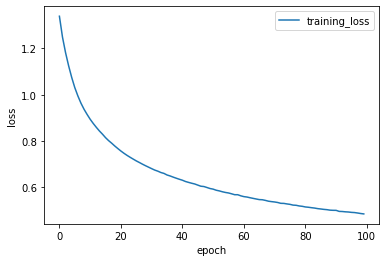

In [14]:
plt.plot(clf.loss_curve_, label='training_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

## 6.4. Model's Weight & Bias

In [15]:
for coef_ in clf.coefs_:
    print(coef_.shape)

(8192, 5)
(5, 5)
(5, 4)


In [16]:
for intercept_ in clf.intercepts_:
    print(intercept_.shape)

(5,)
(5,)
(4,)


# 7. Prediction

## 7.1. Training Set

In [17]:
y_pred_train = clf.predict(X_train_scaled)

## 7.2. Test Set

In [18]:
y_pred_test = clf.predict(X_test_scaled)

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Confusion Matrix

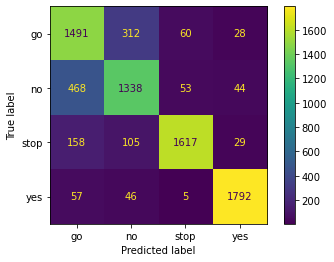

In [19]:
plot_confusion_matrix(clf, X_train_scaled, y_train)

### 8.1.2. Scoring

In [20]:
report = classification_report(y_train, y_pred_train, output_dict=True)

In [21]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
go,0.685833,0.788472,0.733579,1891.000000
no,0.742921,0.703100,0.722462,1903.000000
stop,0.931988,0.847040,0.887486,1909.000000
yes,0.946646,0.943158,0.944898,1900.000000
accuracy,0.820466,0.820466,0.820466,0.820466
macro avg,0.826847,0.820443,0.822107,7603.000000
weighted avg,0.827105,0.820466,0.822249,7603.000000


## 8.2. Test Set

### 8.2.1. Confusion Matrix

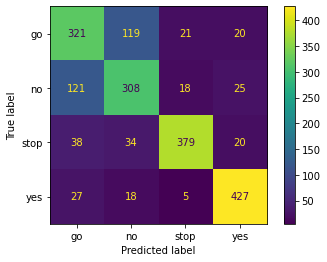

In [22]:
plot_confusion_matrix(clf, X_test_scaled, y_test)

### 8.2.2. Scoring

In [23]:
report = classification_report(y_test, y_pred_test, output_dict=True)

In [24]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
go,0.633136,0.667360,0.649798,481.000000
no,0.643006,0.652542,0.647739,472.000000
stop,0.895981,0.804671,0.847875,471.000000
yes,0.867886,0.895178,0.881321,477.000000
accuracy,0.754866,0.754866,0.754866,0.754866
macro avg,0.760002,0.754938,0.756683,1901.000000
weighted avg,0.759614,0.754866,0.756457,1901.000000


# 9. Save Model

In [25]:
import pickle

In [26]:
pickle.dump((clf, scaler), open('voice_command_model.pickle', 'wb'))